# WORDCLOUD
This section covers the steps to generate a wordcloud based on the genre-specific text from Wikipedia entries of musicians. The process involves importing necessary libraries, loading data, tokenizing text, removing stopwords and irrelevant symbols, applying part-of-speech filtering, and finally, lemmatization to prepare the data for visualization. The wordcloud visually depicts the frequency of significant words used within a particular music genre.

In [364]:
# Import necessary libraries for data manipulation, natural language processing, and visualization
import requests
import json
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import plotly.io as pio
import plotly.express as px
from nltk.stem import SnowballStemmer
nltk.download('punkt')

In [ ]:
wiki = pd.read_csv('names_genres_text_visits_coordinates.csv')

In [317]:
wiki.head()

Artist          Genre  \
0  Taylor Swift      pop music   
1  XXXTentacion      punk rock   
2    Alia Bhatt    Unspecified   
3   Tina Turner  rock and roll   
4  Keanu Reeves  hip hop music   

                                           full_text  2023_visits  \
0  Taylor Alison Swift (born December 13, 1989) i...     22030018   
1  Jahseh Dwayne Ricardo Onfroy (January 23, 1998...     20104479   
2  Alia Bhatt (; born 15 March 1993) is a British...     12669342   
3  Tina Turner (born Anna Mae Bullock; November 2...     11590403   
4  Keanu Charles Reeves ( kee-AH-noo; born Septem...      9916477   

                nationality      continent  
0  United States of America  North America  
1  United States of America  North America  
2                     India           Asia  
3  United States of America  North America  
4                    Canada  North America

### Pop music

In [362]:
pop_music_df = wiki[wiki['Genre'] == 'pop music']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincenzocamerlengo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [274]:
# Tokenize the consolidated text from pop music articles to prepare for wordcloud creation
testo_unificato = ' '.join(pop_music_df['full_text'])

words = []
l = int(len(testo_unificato)/1000)
print('INIZIO TOKENIZE')
for i in range(1000):
    if i == 0:
        start = 0
    
    stop = l*(i+1)
    while testo_unificato[stop+1] != ' ':
        stop += 1
    
    if stop > len(testo_unificato):
        break
    
    else:
        x = word_tokenize(testo_unificato[start:stop])
        words += x
        print(f'Step {i+1}/1000 completed !')
        start = stop

x = word_tokenize(testo_unificato[start:])
words += x
print('FINISH  TOKENIZE!!!!')

INIZIO TOKENIZE
Step 1/1000 completed !
Step 2/1000 completed !
Step 3/1000 completed !
Step 4/1000 completed !
Step 5/1000 completed !
Step 6/1000 completed !
Step 7/1000 completed !
Step 8/1000 completed !
Step 9/1000 completed !
Step 10/1000 completed !
Step 11/1000 completed !
Step 12/1000 completed !
Step 13/1000 completed !
Step 14/1000 completed !
Step 15/1000 completed !
Step 16/1000 completed !
Step 17/1000 completed !
Step 18/1000 completed !
Step 19/1000 completed !
Step 20/1000 completed !
Step 21/1000 completed !
Step 22/1000 completed !
Step 23/1000 completed !
Step 24/1000 completed !
Step 25/1000 completed !
Step 26/1000 completed !
Step 27/1000 completed !
Step 28/1000 completed !
Step 29/1000 completed !
Step 30/1000 completed !
Step 31/1000 completed !
Step 32/1000 completed !
Step 33/1000 completed !
Step 34/1000 completed !
Step 35/1000 completed !
Step 36/1000 completed !
Step 37/1000 completed !
Step 38/1000 completed !
Step 39/1000 completed !
Step 40/1000 compl

In [275]:
# Tag the tokenized words to filter by parts of speech (nouns, adjectives) for the wordcloud
stop_words = set(stopwords.words('english'))
tagged_words = [] 
l = int(len(words)/1000)
print('START TAGGING')
for i in range(1000):
    x = pos_tag(words[l*i:l*(i+1)])
    tagged_words += x
    print(f'Step {i+1}/1000 completed')

x = pos_tag(words[l*1000:])
tagged_words += x
print('FINISH !!!!!!!')

START TAGGING
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed
Step 4

In [276]:
# Filter out stopwords and unnecessary symbols, keeping only significant words
filtered_words = [word for word, tag in tagged_words if word.lower() != '===' and word.lower() != '==' and word.lower() not in stop_words and (tag.startswith('N') or tag.startswith('J'))]

In [277]:
# Apply lemmatization to reduce words to their base form, improving the clarity of the wordcloud
#LEMMATIZATION
stemmer = SnowballStemmer("english")
#stemm_words = [stemmer.stem(word) for word in filtered_words]


stemm_words = [] 
l = int(len(filtered_words)/1000)
print('START LEMMATIZATION')
for i in range(1000):
    x = [stemmer.stem(i) for i in filtered_words[l*i:l*(i+1)]]
    stemm_words += x
    print(f'Step {i+1}/1000 completed')

x = [stemmer.stem(i) for i in filtered_words[l*1000:]]
stemm_words += x
print('FINISH LEMMATIZATION !!!!')

START LEMMATIZATION
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed


In [278]:
word_freq = nltk.FreqDist(stemm_words)
x=500  # numero di parole che voglio far apparire nel wordcloud 
top_words = dict(word_freq.most_common(x))
for i in range(20):
    top_words.pop(next(iter(top_words)))
blue_words = {'video', 'group', 'girl', 'actress', 'selena', 'voic'}

def colorize_word(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in blue_words:
        return 'blue'
    else:
        return 'black'

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1969).generate_from_frequencies(top_words)

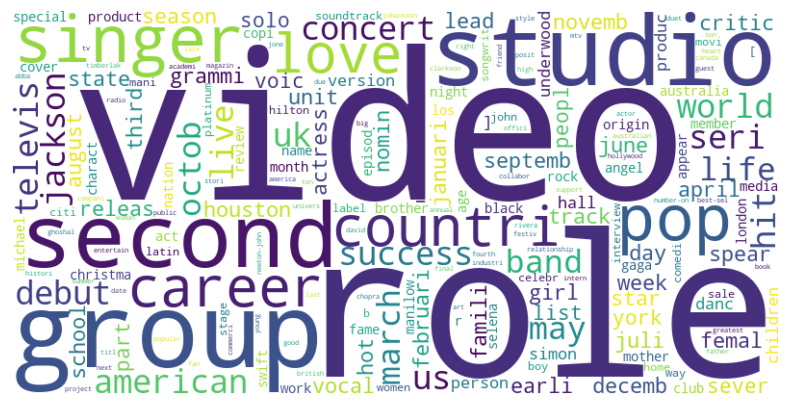

In [282]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/pop1.png', dpi=800)
plt.show()

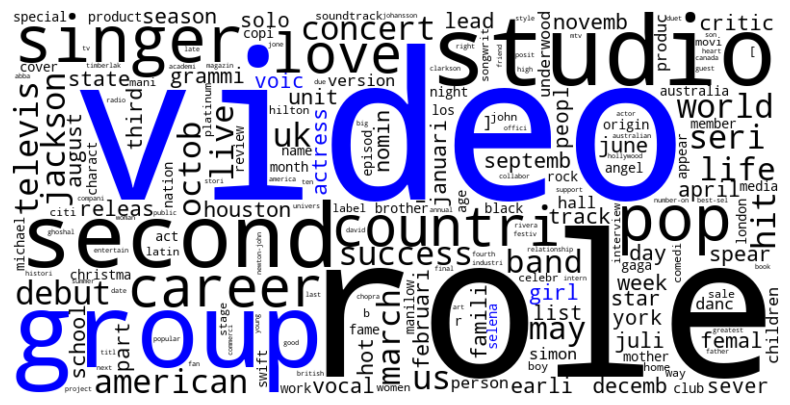

In [283]:
wordcloud_colorized = wordcloud.recolor(color_func=colorize_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/pop2.png', dpi=800)
plt.show()

### Rock music

In [284]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import SnowballStemmer
nltk.download('punkt')

rock_music_df = wiki[wiki['Genre'] == 'rock music']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincenzocamerlengo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [285]:
testo_unificato = ' '.join(rock_music_df['full_text'])

words = []
l = int(len(testo_unificato)/1000)
print('INIZIO TOKENIZE')
for i in range(1000):
    if i == 0:
        start = 0
    
    stop = l*(i+1)
    while testo_unificato[stop+1] != ' ':
        stop += 1
    
    if stop > len(testo_unificato):
        break
    
    else:
        x = word_tokenize(testo_unificato[start:stop])
        words += x
        print(f'Step {i+1}/1000 completed !')
        start = stop

x = word_tokenize(testo_unificato[start:])
words += x
print('FINISH  TOKENIZE!!!!')

INIZIO TOKENIZE
Step 1/1000 completed !
Step 2/1000 completed !
Step 3/1000 completed !
Step 4/1000 completed !
Step 5/1000 completed !
Step 6/1000 completed !
Step 7/1000 completed !
Step 8/1000 completed !
Step 9/1000 completed !
Step 10/1000 completed !
Step 11/1000 completed !
Step 12/1000 completed !
Step 13/1000 completed !
Step 14/1000 completed !
Step 15/1000 completed !
Step 16/1000 completed !
Step 17/1000 completed !
Step 18/1000 completed !
Step 19/1000 completed !
Step 20/1000 completed !
Step 21/1000 completed !
Step 22/1000 completed !
Step 23/1000 completed !
Step 24/1000 completed !
Step 25/1000 completed !
Step 26/1000 completed !
Step 27/1000 completed !
Step 28/1000 completed !
Step 29/1000 completed !
Step 30/1000 completed !
Step 31/1000 completed !
Step 32/1000 completed !
Step 33/1000 completed !
Step 34/1000 completed !
Step 35/1000 completed !
Step 36/1000 completed !
Step 37/1000 completed !
Step 38/1000 completed !
Step 39/1000 completed !
Step 40/1000 compl

In [286]:
stop_words = set(stopwords.words('english'))
tagged_words = [] 
l = int(len(words)/1000)
print('START TAGGING')
for i in range(1000):
    x = pos_tag(words[l*i:l*(i+1)])
    tagged_words += x
    print(f'Step {i+1}/1000 completed')

x = pos_tag(words[l*1000:])
tagged_words += x
print('FINISH !!!!!!!')

START TAGGING
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed
Step 4

In [287]:
filtered_words = [word for word, tag in tagged_words if word.lower() != '===' and word.lower() != '==' and word.lower() not in stop_words and (tag.startswith('N') or tag.startswith('J'))]

In [288]:
#LEMMATIZATION
stemmer = SnowballStemmer("english")
#stemm_words = [stemmer.stem(word) for word in filtered_words]


stemm_words = [] 
l = int(len(filtered_words)/1000)
print('START LEMMATIZATION')
for i in range(1000):
    x = [stemmer.stem(i) for i in filtered_words[l*i:l*(i+1)]]
    stemm_words += x
    print(f'Step {i+1}/1000 completed')

x = [stemmer.stem(i) for i in filtered_words[l*1000:]]
stemm_words += x
print('FINISH LEMMATIZATION !!!!')

START LEMMATIZATION
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed


In [289]:
word_freq = nltk.FreqDist(stemm_words)
x=500  # numero di parole che voglio far apparire nel wordcloud 
top_words = dict(word_freq.most_common(x))
# We exclude the most common words in order to get more meaningful ones
for i in range(20):
    top_words.pop(next(iter(top_words)))
blue_words = {'solo', 'guitar', 'uk', 'group', 'springsteen', 'star', 'hot', 'cooper', 'dead'}

def colorize_word(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in blue_words:
        return 'blue'
    else:
        return 'black'

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1969).generate_from_frequencies(top_words)

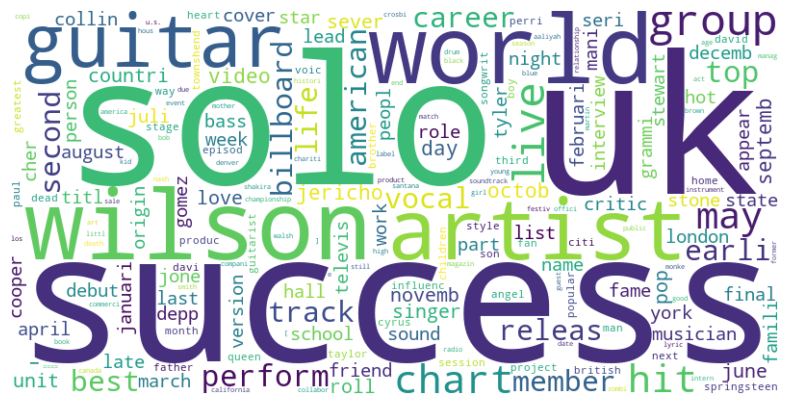

In [290]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/rock1.png', dpi=800)
plt.show()

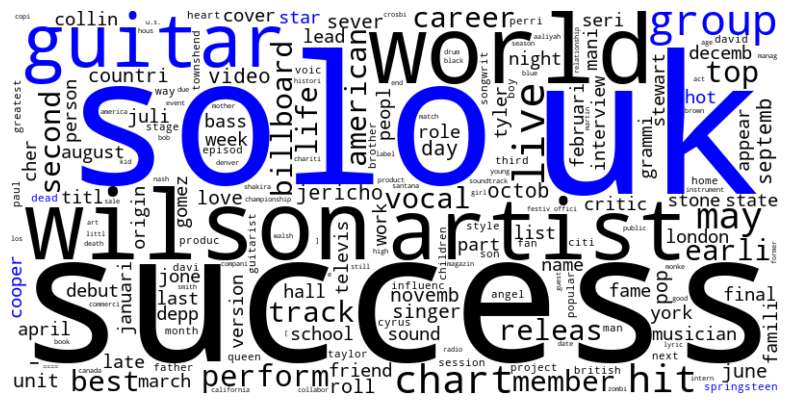

In [292]:
wordcloud_colorized = wordcloud.recolor(color_func=colorize_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/rock2.png', dpi=800)
plt.show()

### Hip Hop music

In [293]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import SnowballStemmer
nltk.download('punkt')

hip_hop_music_df = wiki[wiki['Genre'] == 'hip hop music']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincenzocamerlengo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [294]:
testo_unificato = ' '.join(hip_hop_music_df['full_text'])

words = []
l = int(len(testo_unificato)/1000)
print('INIZIO TOKENIZE')
for i in range(1000):
    if i == 0:
        start = 0
    
    stop = l*(i+1)
    while testo_unificato[stop+1] != ' ':
        stop += 1
    
    if stop > len(testo_unificato):
        break
    
    else:
        x = word_tokenize(testo_unificato[start:stop])
        words += x
        print(f'Step {i+1}/1000 completed !')
        start = stop

x = word_tokenize(testo_unificato[start:])
words += x
print('FINISH  TOKENIZE!!!!')

INIZIO TOKENIZE
Step 1/1000 completed !
Step 2/1000 completed !
Step 3/1000 completed !
Step 4/1000 completed !
Step 5/1000 completed !
Step 6/1000 completed !
Step 7/1000 completed !
Step 8/1000 completed !
Step 9/1000 completed !
Step 10/1000 completed !
Step 11/1000 completed !
Step 12/1000 completed !
Step 13/1000 completed !
Step 14/1000 completed !
Step 15/1000 completed !
Step 16/1000 completed !
Step 17/1000 completed !
Step 18/1000 completed !
Step 19/1000 completed !
Step 20/1000 completed !
Step 21/1000 completed !
Step 22/1000 completed !
Step 23/1000 completed !
Step 24/1000 completed !
Step 25/1000 completed !
Step 26/1000 completed !
Step 27/1000 completed !
Step 28/1000 completed !
Step 29/1000 completed !
Step 30/1000 completed !
Step 31/1000 completed !
Step 32/1000 completed !
Step 33/1000 completed !
Step 34/1000 completed !
Step 35/1000 completed !
Step 36/1000 completed !
Step 37/1000 completed !
Step 38/1000 completed !
Step 39/1000 completed !
Step 40/1000 compl

In [295]:
stop_words = set(stopwords.words('english'))
tagged_words = [] 
l = int(len(words)/1000)
print('START TAGGING')
for i in range(1000):
    x = pos_tag(words[l*i:l*(i+1)])
    tagged_words += x
    print(f'Step {i+1}/1000 completed')

x = pos_tag(words[l*1000:])
tagged_words += x
print('FINISH !!!!!!!')

START TAGGING
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed
Step 4

In [296]:
filtered_words = [word for word, tag in tagged_words if word.lower() != '===' and word.lower() != '==' and word.lower() not in stop_words and (tag.startswith('N') or tag.startswith('J'))]

In [297]:
#LEMMATIZATION
stemmer = SnowballStemmer("english")
#stemm_words = [stemmer.stem(word) for word in filtered_words]


stemm_words = [] 
l = int(len(filtered_words)/1000)
print('START LEMMATIZATION')
for i in range(1000):
    x = [stemmer.stem(i) for i in filtered_words[l*i:l*(i+1)]]
    stemm_words += x
    print(f'Step {i+1}/1000 completed')

x = [stemmer.stem(i) for i in filtered_words[l*1000:]]
stemm_words += x
print('FINISH LEMMATIZATION !!!!')

START LEMMATIZATION
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed


In [298]:
word_freq = nltk.FreqDist(stemm_words)
x=500  # numero di parole che voglio far apparire nel wordcloud 
top_words = dict(word_freq.most_common(x))
for i in range(25):
    top_words.pop(next(iter(top_words)))
blue_words = {'rap', 'track', 'eminem', 'black', 'origin', 'money', 'american', 'mixtap'}

def colorize_word(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in blue_words:
        return 'blue'
    else:
        return 'black'

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1969).generate_from_frequencies(top_words)

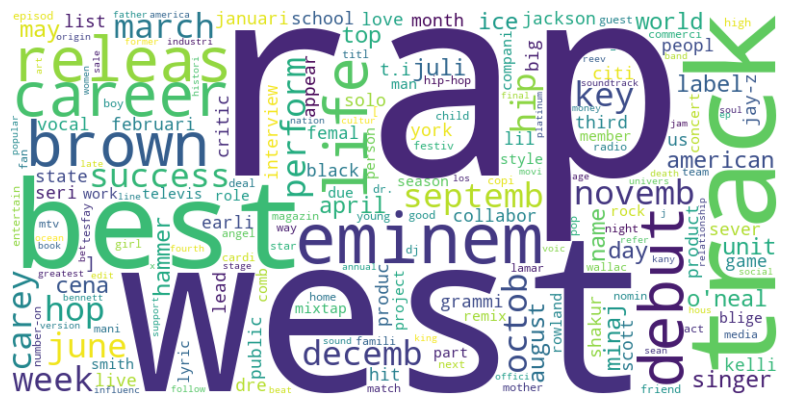

In [299]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/hiphop1.png', dpi=800)
plt.show()

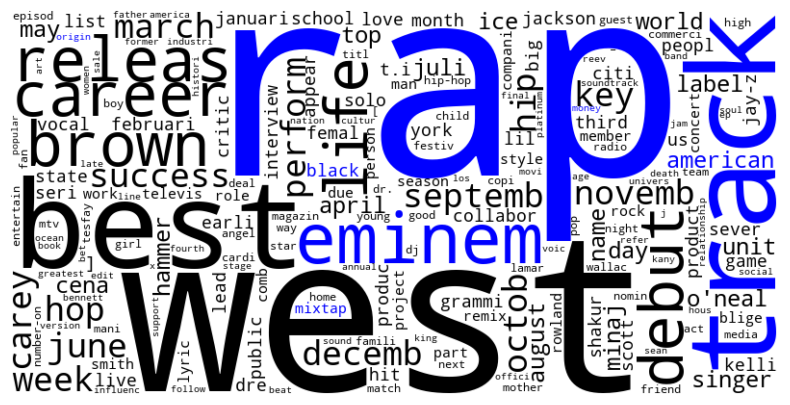

In [300]:
wordcloud_colorized = wordcloud.recolor(color_func=colorize_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/hiphop2.png', dpi=800)
plt.show()

### Country music

In [301]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import SnowballStemmer
nltk.download('punkt')

country_music_df = wiki[wiki['Genre'] == 'country music']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincenzocamerlengo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [302]:
testo_unificato = ' '.join(country_music_df['full_text'])

words = []
l = int(len(testo_unificato)/1000)
print('INIZIO TOKENIZE')
for i in range(1000):
    if i == 0:
        start = 0
    
    stop = l*(i+1)
    while testo_unificato[stop+1] != ' ':
        stop += 1
    
    if stop > len(testo_unificato):
        break
    
    else:
        x = word_tokenize(testo_unificato[start:stop])
        words += x
        print(f'Step {i+1}/1000 completed !')
        start = stop

x = word_tokenize(testo_unificato[start:])
words += x
print('FINISH  TOKENIZE!!!!')

INIZIO TOKENIZE
Step 1/1000 completed !
Step 2/1000 completed !
Step 3/1000 completed !
Step 4/1000 completed !
Step 5/1000 completed !
Step 6/1000 completed !
Step 7/1000 completed !
Step 8/1000 completed !
Step 9/1000 completed !
Step 10/1000 completed !
Step 11/1000 completed !
Step 12/1000 completed !
Step 13/1000 completed !
Step 14/1000 completed !
Step 15/1000 completed !
Step 16/1000 completed !
Step 17/1000 completed !
Step 18/1000 completed !
Step 19/1000 completed !
Step 20/1000 completed !
Step 21/1000 completed !
Step 22/1000 completed !
Step 23/1000 completed !
Step 24/1000 completed !
Step 25/1000 completed !
Step 26/1000 completed !
Step 27/1000 completed !
Step 28/1000 completed !
Step 29/1000 completed !
Step 30/1000 completed !
Step 31/1000 completed !
Step 32/1000 completed !
Step 33/1000 completed !
Step 34/1000 completed !
Step 35/1000 completed !
Step 36/1000 completed !
Step 37/1000 completed !
Step 38/1000 completed !
Step 39/1000 completed !
Step 40/1000 compl

In [303]:
stop_words = set(stopwords.words('english'))
tagged_words = [] 
l = int(len(words)/1000)
print('START TAGGING')
for i in range(1000):
    x = pos_tag(words[l*i:l*(i+1)])
    tagged_words += x
    print(f'Step {i+1}/1000 completed')

x = pos_tag(words[l*1000:])
tagged_words += x
print('FINISH !!!!!!!')

START TAGGING
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed
Step 4

In [304]:
filtered_words = [word for word, tag in tagged_words if word.lower() != '===' and word.lower() != '==' and word.lower() not in stop_words and (tag.startswith('N') or tag.startswith('J'))]

In [305]:
#LEMMATIZATION
stemmer = SnowballStemmer("english")
#stemm_words = [stemmer.stem(word) for word in filtered_words]


stemm_words = [] 
l = int(len(filtered_words)/1000)
print('START LEMMATIZATION')
for i in range(1000):
    x = [stemmer.stem(i) for i in filtered_words[l*i:l*(i+1)]]
    stemm_words += x
    print(f'Step {i+1}/1000 completed')

x = [stemmer.stem(i) for i in filtered_words[l*1000:]]
stemm_words += x
print('FINISH LEMMATIZATION !!!!')

START LEMMATIZATION
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed


In [306]:
word_freq = nltk.FreqDist(stemm_words)
x=500  # numero di parole che voglio far apparire nel wordcloud 
top_words = dict(word_freq.most_common(x))
for i in range(20):
    top_words.pop(next(iter(top_words)))
blue_words = {'alabama', 'nashvill', 'american', 'guitar', 'love', 'friend', 'cash'}

def colorize_word(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in blue_words:
        return 'blue'
    else:
        return 'black'

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1969).generate_from_frequencies(top_words)

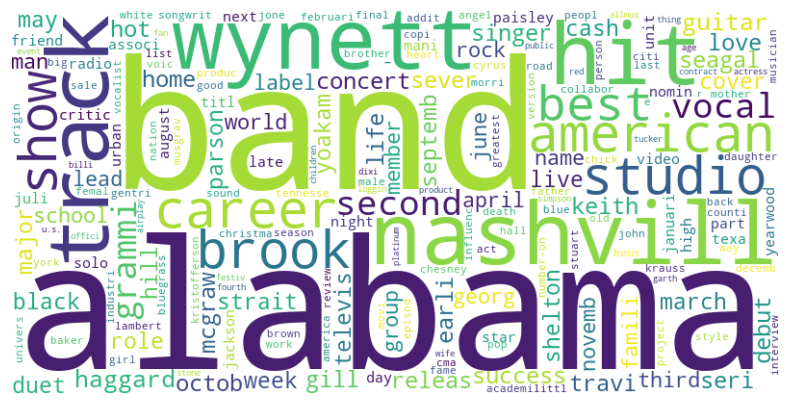

In [307]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/country1.png', dpi=800)
plt.show()

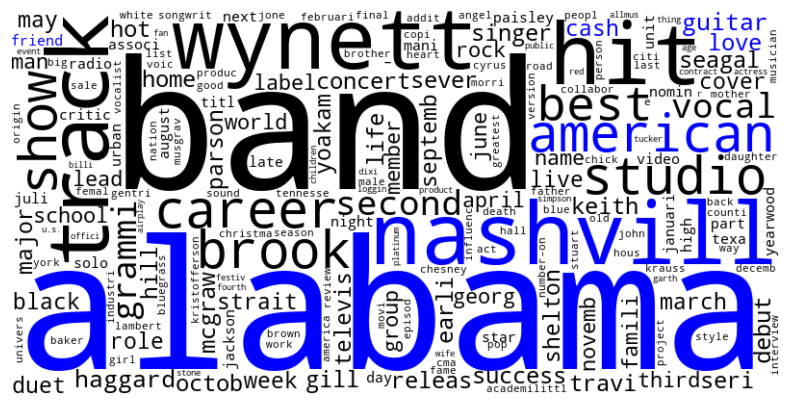

In [308]:
wordcloud_colorized = wordcloud.recolor(color_func=colorize_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/country2.png', dpi=800)
plt.show()

### Jazz music

In [309]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import SnowballStemmer
nltk.download('punkt')

jazz_df = wiki[wiki['Genre'] == 'jazz']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincenzocamerlengo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [310]:
testo_unificato = ' '.join(jazz_df['full_text'])

words = []
l = int(len(testo_unificato)/1000)
print('INIZIO TOKENIZE')
for i in range(1000):
    if i == 0:
        start = 0
    
    stop = l*(i+1)
    while testo_unificato[stop+1] != ' ':
        stop += 1
    
    if stop > len(testo_unificato):
        break
    
    else:
        x = word_tokenize(testo_unificato[start:stop])
        words += x
        print(f'Step {i+1}/1000 completed !')
        start = stop

x = word_tokenize(testo_unificato[start:])
words += x
print('FINISH  TOKENIZE!!!!')

INIZIO TOKENIZE
Step 1/1000 completed !
Step 2/1000 completed !
Step 3/1000 completed !
Step 4/1000 completed !
Step 5/1000 completed !
Step 6/1000 completed !
Step 7/1000 completed !
Step 8/1000 completed !
Step 9/1000 completed !
Step 10/1000 completed !
Step 11/1000 completed !
Step 12/1000 completed !
Step 13/1000 completed !
Step 14/1000 completed !
Step 15/1000 completed !
Step 16/1000 completed !
Step 17/1000 completed !
Step 18/1000 completed !
Step 19/1000 completed !
Step 20/1000 completed !
Step 21/1000 completed !
Step 22/1000 completed !
Step 23/1000 completed !
Step 24/1000 completed !
Step 25/1000 completed !
Step 26/1000 completed !
Step 27/1000 completed !
Step 28/1000 completed !
Step 29/1000 completed !
Step 30/1000 completed !
Step 31/1000 completed !
Step 32/1000 completed !
Step 33/1000 completed !
Step 34/1000 completed !
Step 35/1000 completed !
Step 36/1000 completed !
Step 37/1000 completed !
Step 38/1000 completed !
Step 39/1000 completed !
Step 40/1000 compl

In [311]:
stop_words = set(stopwords.words('english'))
tagged_words = [] 
l = int(len(words)/1000)
print('START TAGGING')
for i in range(1000):
    x = pos_tag(words[l*i:l*(i+1)])
    tagged_words += x
    print(f'Step {i+1}/1000 completed')

x = pos_tag(words[l*1000:])
tagged_words += x
print('FINISH !!!!!!!')

START TAGGING
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed
Step 4

In [312]:
filtered_words = [word for word, tag in tagged_words if word.lower() != '===' and word.lower() != '==' and word.lower() not in stop_words and (tag.startswith('N') or tag.startswith('J'))]

In [313]:
#LEMMATIZATION
stemmer = SnowballStemmer("english")
#stemm_words = [stemmer.stem(word) for word in filtered_words]


stemm_words = [] 
l = int(len(filtered_words)/1000)
print('START LEMMATIZATION')
for i in range(1000):
    x = [stemmer.stem(i) for i in filtered_words[l*i:l*(i+1)]]
    stemm_words += x
    print(f'Step {i+1}/1000 completed')

x = [stemmer.stem(i) for i in filtered_words[l*1000:]]
stemm_words += x
print('FINISH LEMMATIZATION !!!!')

START LEMMATIZATION
Step 1/1000 completed
Step 2/1000 completed
Step 3/1000 completed
Step 4/1000 completed
Step 5/1000 completed
Step 6/1000 completed
Step 7/1000 completed
Step 8/1000 completed
Step 9/1000 completed
Step 10/1000 completed
Step 11/1000 completed
Step 12/1000 completed
Step 13/1000 completed
Step 14/1000 completed
Step 15/1000 completed
Step 16/1000 completed
Step 17/1000 completed
Step 18/1000 completed
Step 19/1000 completed
Step 20/1000 completed
Step 21/1000 completed
Step 22/1000 completed
Step 23/1000 completed
Step 24/1000 completed
Step 25/1000 completed
Step 26/1000 completed
Step 27/1000 completed
Step 28/1000 completed
Step 29/1000 completed
Step 30/1000 completed
Step 31/1000 completed
Step 32/1000 completed
Step 33/1000 completed
Step 34/1000 completed
Step 35/1000 completed
Step 36/1000 completed
Step 37/1000 completed
Step 38/1000 completed
Step 39/1000 completed
Step 40/1000 completed
Step 41/1000 completed
Step 42/1000 completed
Step 43/1000 completed


In [314]:
# Create and display the wordcloud for the genre 'jazz', showing the most common words visually
word_freq = nltk.FreqDist(stemm_words)
x=500  # numero di parole che voglio far apparire nel wordcloud 
top_words = dict(word_freq.most_common(x))
for i in range(32):
    top_words.pop(next(iter(top_words)))
blue_words = {'black', 'american', 'group'}

def colorize_word(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in blue_words:
        return 'blue'
    else:
        return 'black'

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1969).generate_from_frequencies(top_words)


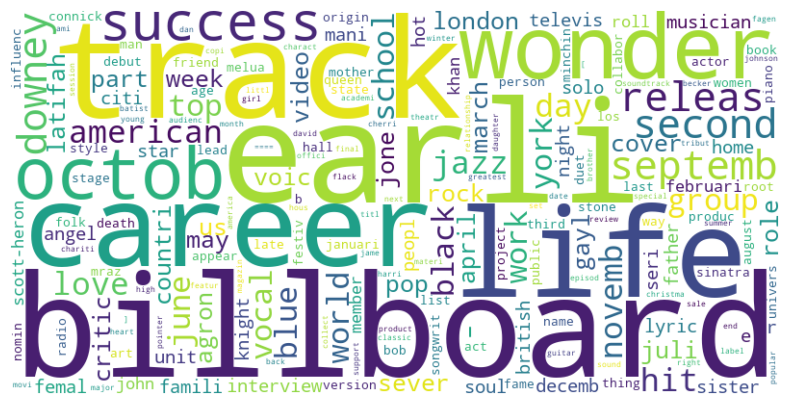

In [315]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/jazz1.png', dpi=800)
plt.show()

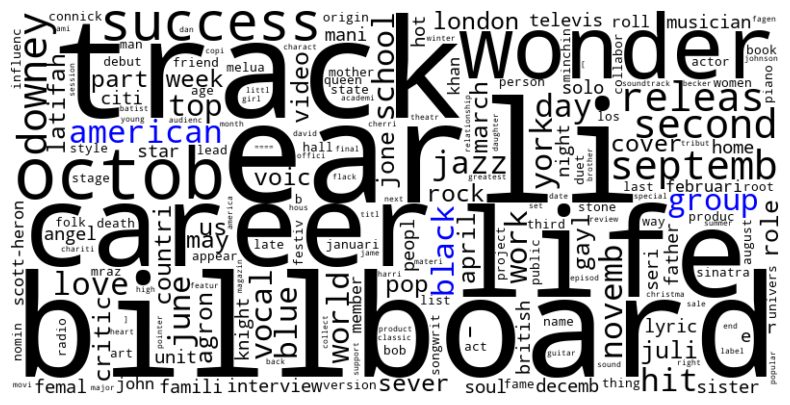

In [316]:
wordcloud_colorized = wordcloud.recolor(color_func=colorize_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/jazz2.png', dpi=800)
plt.show()

# SUNBURST
In this section, two sunburst plots are created to visualize the distribution of artists by genre, nationality, and continent. The data is first filtered for selected genres and then grouped in two different hierarchical orders for comparative visualization. The sunburst plots are generated using Plotly, showcasing the hierarchical relationships and the proportion of artists within each category.

In [321]:
wiki2 = wiki[(wiki['Genre'] == 'pop music') | (wiki['Genre'] == 'rock music') | (wiki['Genre'] == 'hip hop music') | (wiki['Genre'] == 'country music') | (wiki['Genre'] == 'jazz')]

In [359]:
# Group data by genre, continent, and nationality, then create a sunburst plot to visualize artist distribution
# 1. Raggruppa il DataFrame per genere, continente e nazionalità e conta il numero di artisti
grouped_df = wiki2.groupby(['Genre', 'continent', 'nationality']).size().reset_index(name='Num_Artists')

# 2. Crea il sunburst plot
fig = px.sunburst(grouped_df, path=['Genre', 'continent', 'nationality'], values='Num_Artists')

# Imposta il titolo del plot
fig.update_layout(width=1200, height=900, margin=dict(l=50, r=50, t=50, b=50))

#pio.write_html(fig, '/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/sun1.html')
fig.show()

In [360]:
# Group data by continent, nationality, and genre, then create a sunburst plot with a different hierarchy to compare with the first
# 1. Raggruppa il DataFrame per genere, continente e nazionalità e conta il numero di artisti
grouped_df = wiki2.groupby(['continent', 'nationality', 'Genre']).size().reset_index(name='Num_Artists')


# 2. Crea il sunburst plot
fig = px.sunburst(grouped_df, path=['continent', 'nationality', 'Genre'], values='Num_Artists')

# Imposta il titolo del plot
fig.update_layout(width=1200, height=900, margin=dict(l=50, r=50, t=50, b=50))

#pio.write_html(fig, '/Users/vincenzocamerlengo/Desktop/Data Visualization/Project/Cartella Condivisa/wordlcoud/grafici/sun2.html')
fig.show()